In [1]:
!pip install scikit-plot


You should consider upgrading via the '/home/ccs/Notebooks/my_env/bin/python3.6 -m pip install --upgrade pip' command.


In [2]:
import sys
!{sys.executable} -m pip install xgboost

You should consider upgrading via the '/home/ccs/Notebooks/my_env/bin/python3.6 -m pip install --upgrade pip' command.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier as xgb
import warnings

In [4]:
%matplotlib inline
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")
plt.rc("font", family="serif", size=15)

In [5]:
PdM_errors_url="https://raw.githubusercontent.com/soumya-soman/predictive-maintenance/master/PdM_errors.csv"
 
errors = pd.read_csv(PdM_errors_url)
errors.head(5)
#remove

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [2]:
maint_url="https://raw.githubusercontent.com/soumya-soman/predictive-maintenance/master/PdM_maint.csv"
 
maint = pd.read_csv(maint_url)
maint.head(25)


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4
5,2015-01-05 06:00:00,1,comp1
6,2015-01-20 06:00:00,1,comp3
7,2015-01-20 06:00:00,1,comp1
8,2015-02-04 06:00:00,1,comp4
9,2015-02-04 06:00:00,1,comp3


In [7]:
failures_url="https://raw.githubusercontent.com/soumya-soman/predictive-maintenance/master/PdM_failures.csv"
 
failures = pd.read_csv(failures_url)
failures.head()
#plot pair plot
## if 761 is applicable for all machines
# machines== comp distribution
#create  but delete manually


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [8]:
machines_url="https://raw.githubusercontent.com/soumya-soman/predictive-maintenance/master/PdM_machines.csv"
 
machines = pd.read_csv(machines_url)
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [9]:
telemetry_url="https://raw.githubusercontent.com/soumya-soman/predictive-maintenance/master/PdM_telemetry.csv"
 
telemetry = pd.read_csv(telemetry_url)
telemetry.tail()

,datetime,machineID,volt,rotate,pressure,vibration
968584,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941
968585,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072
968586,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561
968587,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259
968588,2016-01-01 06:00:00,100,171.336037,496.096870,79.095538,37.845245


In [10]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [11]:
telemetry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968589 entries, 0 to 968588
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   datetime   968589 non-null  object 
 1   machineID  968589 non-null  int64  
 2   volt       968589 non-null  float64
 3   rotate     968589 non-null  float64
 4   pressure   968588 non-null  float64
 5   vibration  968588 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 44.3+ MB


In [12]:
telemetry.dtypes

datetime      object
machineID      int64
volt         float64
rotate       float64
pressure     float64
vibration    float64
dtype: object

In [13]:
telemetry["machineID"].nunique()

100

In [14]:
telemetry["datetime"] = pd.to_datetime(telemetry["datetime"], format="%Y-%m-%d %H:%M:%S")
telemetry.dtypes

datetime     datetime64[ns]
machineID             int64
volt                float64
rotate              float64
pressure            float64
vibration           float64
dtype: object

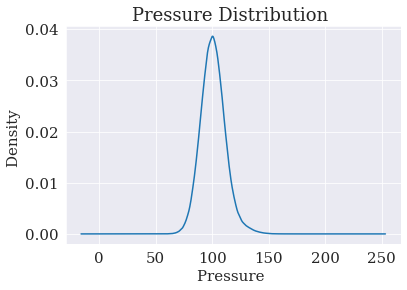

In [15]:
telemetry["pressure"].plot(kind="kde")
plt.title("Pressure Distribution ")
plt.ylabel("Density ")
plt.xlabel("Pressure ")
plt.show()

In [16]:
telemetry.describe() 

,machineID,volt,rotate,pressure,vibration
count,968589.000000,968589.000000,968589.000000,968588.000000,968588.000000
mean,46.230727,170.774142,446.591217,100.841515,40.383648
std,30.450414,15.507497,52.701692,11.028763,5.366198
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,18.000000,160.298216,412.278337,93.492369,36.778303
50%,45.000000,170.597661,447.555434,100.414332,40.237433
75%,73.000000,181.006239,482.154396,107.535244,43.781329
max,100.000000,255.124717,695.020984,185.951998,76.791072


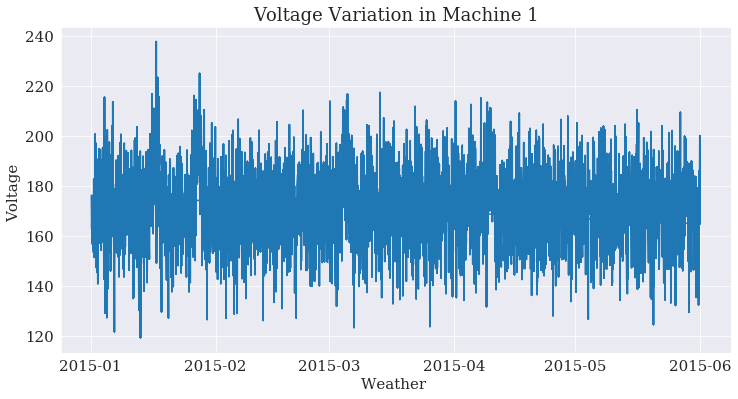

In [17]:
# We show an example graph of the voltage values ​​for machine 1 during the first 6 months of 2015.

plot_df = telemetry.loc[
    (telemetry["machineID"] == 1)
    & (telemetry["datetime"] > pd.to_datetime("2015-01-01"))
    & (telemetry["datetime"] < pd.to_datetime("2015-06-01")), ["datetime", "volt"]
]

plt.figure(figsize=(12, 6))
plt.plot(plot_df["datetime"], plot_df["volt"])
plt.title("Voltage Variation in Machine 1")
plt.ylabel("Voltage ")

# We make labels legible.
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = "%m-%d"
plt.xlabel("Weather ")
plt.show()

In [18]:
##ERROR DATA ANALYSIS
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [19]:
errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3919 non-null   object
 1   machineID  3919 non-null   int64 
 2   errorID    3919 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.0+ KB


In [20]:
# Formatting the date and time field that comes as a string.
# Categories allow comparison between values, automatic ordering, easier graphing and other functions.
# Also less memory (similar to "factor" in R).
errors["datetime"] = pd.to_datetime(errors["datetime"], format="%Y-%m-%d %H:%M:%S")
errors["errorID"] = errors["errorID"].astype("category")

errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


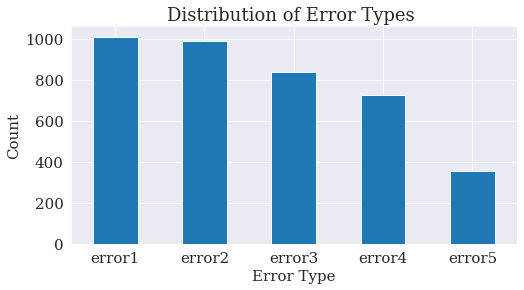

In [21]:
#sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
errors["errorID"].value_counts().plot(kind="bar", rot=0)
plt.title("Distribution of Error Types ")
plt.ylabel("Count")
plt.xlabel("Error Type")
plt.show()

In [22]:
## MAINT DATA ANALYSIS
maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [23]:
maint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3286 non-null   object
 1   machineID  3286 non-null   int64 
 2   comp       3286 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.1+ KB


In [24]:
# Formatting the date and time field that comes as a string.
maint["datetime"] = pd.to_datetime(maint["datetime"], format="%Y-%m-%d %H:%M:%S")
maint["comp"] = maint["comp"].astype("category")
maint.dtypes

datetime     datetime64[ns]
machineID             int64
comp               category
dtype: object

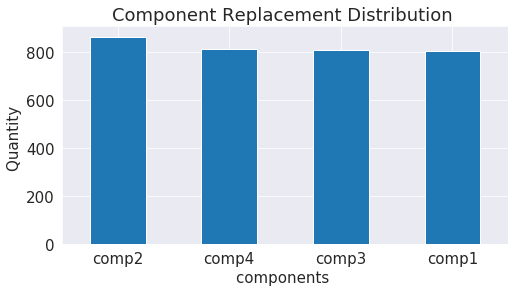

In [25]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
maint["comp"].value_counts().plot(kind="bar", rot=0)
plt.title("Component Replacement Distribution ")
plt.ylabel("Quantity ")
plt.xlabel("components ")
plt.show()

In [26]:
##Machines data analysis
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [27]:
machines.shape
machines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   machineID  100 non-null    int64 
 1   model      100 non-null    object
 2   age        100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [28]:
machines.dtypes

machineID     int64
model        object
age           int64
dtype: object

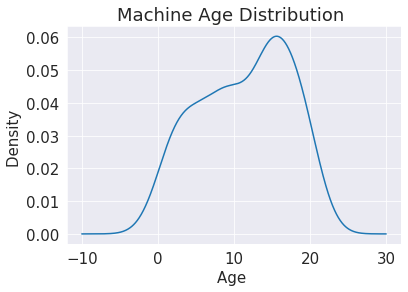

In [29]:
# We check if there are several hills as it can suggest two different groups.
machines["age"].plot(kind="kde")
plt.title("Machine Age Distribution ")
plt.xlabel("Age ")
plt.ylabel("Density ")
plt.show()

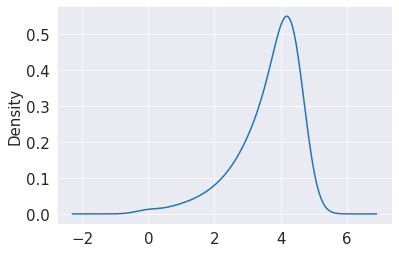

In [30]:
# We apply natural logarithm to normalize.
np.log(machines[machines["age"] != 0].iloc[:, 0]).plot(kind="kde")
plt.show()

In [31]:
machines["model"] = machines["model"].astype("category")
machines.dtypes

machineID       int64
model        category
age             int64
dtype: object

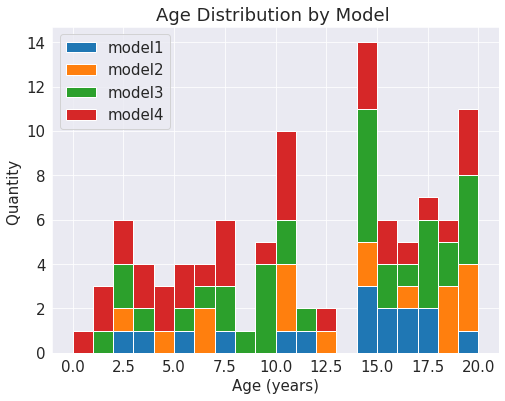

In [32]:
plt.figure(figsize=(8, 6))
_, bins, _ = plt.hist([
    machines.loc[machines["model"] == "model1", "age"],
    machines.loc[machines["model"] == "model2", "age"],
    machines.loc[machines["model"] == "model3", "age"],
    machines.loc[machines["model"] == "model4", "age"]],
    20, stacked=True, label=["model1", "model2", "model3", "model4"
])
plt.title("Age Distribution by Model ")
plt.xlabel("Age (years)")
plt.ylabel("Quantity ")
plt.legend()
plt.show()

In [33]:
## Failures data analysis
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [34]:
failures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   761 non-null    object
 1   machineID  761 non-null    int64 
 2   failure    761 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.0+ KB


In [35]:
# We format the datetime that comes as a string
failures["datetime"] = pd.to_datetime(failures["datetime"], format="%Y-%m-%d %H:%M:%S")
failures["failure"] = failures["failure"].astype("category")
failures.dtypes

datetime     datetime64[ns]
machineID             int64
failure            category
dtype: object

In [36]:
failures.describe(include="all")

,datetime,machineID,failure
count,761,761.000000,761
unique,302,NaN,4
top,2015-01-02 03:00:00,NaN,comp2
freq,18,NaN,259
first,2015-01-02 03:00:00,NaN,NaN
last,2015-12-31 06:00:00,NaN,NaN
mean,NaN,51.911958,NaN
std,NaN,29.515542,NaN
min,NaN,1.000000,NaN
25%,NaN,24.000000,NaN


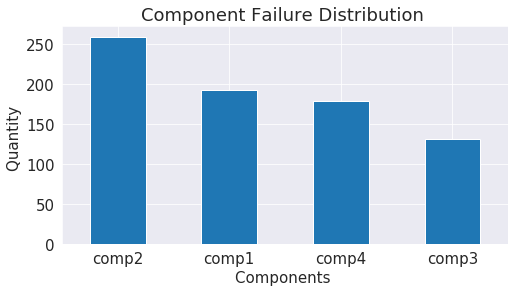

In [37]:
plt.figure(figsize=(8, 4))
failures["failure"].value_counts().plot(kind="bar", rot=0)
plt.title("Component Failure Distribution ")
plt.ylabel("Quantity ")
plt.xlabel("Components ")
plt.show()

In [38]:
# We calculate average values ​​for telemetry characteristics
# we pivot because we need the datetime as an index for "resample" to work
# resample creates the lagging
# closed = 'right' => (6:00, 9:00] or 6:00 < x <= 9:00
# closed='left'  => [6:00, 9:00) or 6:00 <= x < 9:00
# it can't be both
# unstack: return df to original format
# we have 100 machines, 4 sensors = 400 columns
# unstack shows a dataseries in the columns as an index and returns series (if there are several indexes they are rearranged).
# Each dataframe in temp has the values ​​of the field that corresponds to it at that moment.

temp = []
fields = ["volt", "rotate", "pressure", "vibration"]
temp = [
    pd.pivot_table(
        telemetry,
        index="datetime",
        columns="machineID",
        values=col).resample("3H", closed="left", label="right").mean().unstack()
    for col in fields
]
temp[1].head()

machineID  datetime           
1          2015-01-01 09:00:00    449.533798
           2015-01-01 12:00:00    403.949857
           2015-01-01 15:00:00    435.781707
           2015-01-01 18:00:00    430.472823
           2015-01-01 21:00:00    437.111120
dtype: float64

In [39]:
temp

[machineID  datetime           
 1          2015-01-01 09:00:00    170.028993
            2015-01-01 12:00:00    164.192565
            2015-01-01 15:00:00    168.134445
            2015-01-01 18:00:00    165.514453
            2015-01-01 21:00:00    168.809347
                                      ...    
 100        2015-12-31 21:00:00    166.078945
            2016-01-01 00:00:00    158.327984
            2016-01-01 03:00:00    170.306956
            2016-01-01 06:00:00    182.525427
            2016-01-01 09:00:00    171.336037
 Length: 292100, dtype: float64,
 machineID  datetime           
 1          2015-01-01 09:00:00    449.533798
            2015-01-01 12:00:00    403.949857
            2015-01-01 15:00:00    435.781707
            2015-01-01 18:00:00    430.472823
            2015-01-01 21:00:00    437.111120
                                      ...    
 100        2015-12-31 21:00:00    424.431184
            2016-01-01 00:00:00    504.056262
            2016-01-01 03:00:

In [40]:
telemetry.sample()

,datetime,machineID,volt,rotate,pressure,vibration
817789,2015-10-15 16:00:00,83,172.05184,479.961333,112.616379,36.269328


In [41]:
telemetry_mean_3h = pd.concat(temp, axis=1) # We unite the series.
telemetry_mean_3h.columns = [col + "mean_3h" for col in fields] # We assign column names.
telemetry_mean_3h.reset_index(inplace=True) # We flatten the frame.
telemetry_mean_3h.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


In [42]:
# We repeat for the standard deviation.
temp = [
    pd.pivot_table(
        telemetry,
        index="datetime",
        columns="machineID",
        values=col).resample("3H", closed="left", label="right").std().unstack()
    for col in fields
]
temp[0].head()

machineID  datetime           
1          2015-01-01 09:00:00     6.721032
           2015-01-01 12:00:00     7.596570
           2015-01-01 15:00:00    10.124584
           2015-01-01 18:00:00     4.673269
           2015-01-01 21:00:00    14.752132
dtype: float64

In [43]:
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + "sd_3h" for i in fields]
telemetry_sd_3h.reset_index(inplace=True)
telemetry_sd_3h.head()

,machineID,datetime,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h
0,1,2015-01-01 09:00:00,6.721032,67.849599,18.934956,5.874970
1,1,2015-01-01 12:00:00,7.596570,50.120452,8.555032,7.662229
2,1,2015-01-01 15:00:00,10.124584,55.084734,5.909721,5.169304
3,1,2015-01-01 18:00:00,4.673269,42.047278,4.554047,2.106108
4,1,2015-01-01 21:00:00,14.752132,47.048609,4.244158,2.207884


In [44]:
# To capture a longer-term effect, the 24-hour lagging functions are also calculated.
# We create new values ​​with 24-hour averages, and then select the first result every 3 hours.
# In this way we can join the results with the previous lagging characteristics (calculated at 3 hours).

temp = []
fields = ["volt", "rotate", "pressure", "vibration"]

temp = [
    pd.pivot_table(
        telemetry,
        index="datetime",
        columns="machineID",
        values=col).rolling(window=24).mean().resample("3H", closed="left", label="right").first().unstack()
    for col in fields
]
temp[0].head()

machineID  datetime           
1          2015-01-01 09:00:00   NaN
           2015-01-01 12:00:00   NaN
           2015-01-01 15:00:00   NaN
           2015-01-01 18:00:00   NaN
           2015-01-01 21:00:00   NaN
dtype: float64

In [45]:
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + "mean_24h" for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
# Due to the moving average method, the first 23 records are null; you have to eliminate them.
# It does not happen at the end of the frame because rolling stops at the end.
# We end up with a frame of less data than the original telemetry as well as the previous 3H.
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h["voltmean_24h"].isnull()]
telemetry_mean_24h.head()

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
7,1,2015-01-02 06:00:00,169.733809,445.179865,96.797113,40.385160
8,1,2015-01-02 09:00:00,170.614862,446.364859,96.849785,39.736826
9,1,2015-01-02 12:00:00,169.893965,447.009407,97.715600,39.498374
10,1,2015-01-02 15:00:00,171.243444,444.233563,96.666060,40.229370
11,1,2015-01-02 18:00:00,170.792486,448.440437,95.766838,40.055214


In [46]:
# We repeat for the standard deviation
temp = []
fields = ["volt", "rotate", "pressure", "vibration"]

temp = [
    pd.pivot_table(
        telemetry,
        index="datetime",
        columns="machineID",
        values=col).rolling(window=24).std().resample("3H", closed="left", label="right").first().unstack(level=-1)
    for col in fields
]
temp[0].head()

machineID  datetime           
1          2015-01-01 09:00:00   NaN
           2015-01-01 12:00:00   NaN
           2015-01-01 15:00:00   NaN
           2015-01-01 18:00:00   NaN
           2015-01-01 21:00:00   NaN
dtype: float64

In [47]:
telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + "sd_24h" for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h["voltsd_24h"].isnull()]
telemetry_sd_24h.head(10)

,machineID,datetime,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
7,1,2015-01-02 06:00:00,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,13.370357,42.432317,9.471669,6.195076
10,1,2015-01-02 15:00:00,13.299281,41.346121,8.731229,5.687944
11,1,2015-01-02 18:00:00,13.954518,43.490234,8.061653,5.898069
12,1,2015-01-02 21:00:00,14.402740,42.626186,10.408012,5.941890
13,1,2015-01-03 00:00:00,15.513819,40.395881,10.833294,5.737671
14,1,2015-01-03 03:00:00,15.726970,39.648116,11.904700,5.601191
15,1,2015-01-03 06:00:00,15.635083,41.828592,11.326412,5.583521
16,1,2015-01-03 09:00:00,13.995465,40.843882,11.036546,5.561553


In [48]:
# We combine the features created so far.
# We take the values ​​2: 6 to avoid duplicate IDs and dates.
# axis = 0 we move in the direction of the rows, axis = 1, we move in the direction of the columns.
telemetry_feat = pd.concat([
    telemetry_mean_3h,
    telemetry_sd_3h.iloc[:, 2:6],
    telemetry_mean_24h.iloc[:, 2:6],
    telemetry_sd_24h.iloc[:, 2:6]], axis=1).dropna()
telemetry_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
7,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076
10,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944
11,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069


In [49]:
telemetry_feat.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.771416,446.612972,100.855301,40.384328,13.299858,44.456335,8.885822,4.440660,170.772579,446.613440,100.854547,40.384564,14.918849,49.947916,10.046687,5.002065
std,28.86612,9.497201,33.122865,7.408854,3.476641,6.966647,23.216421,4.656341,2.320066,4.716970,18.074248,4.733098,2.059861,2.260726,7.682126,1.713726,0.799820
min,1.00000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,266.010419,91.057429,35.060087,6.380619,18.385248,4.145308,2.144863
25%,25.75000,164.445576,427.568132,96.238173,38.147839,8.027455,26.903567,5.370647,2.684308,168.070890,441.549802,98.668589,39.354062,13.358663,44.668824,8.924317,4.460347
50%,50.50000,170.430790,448.385564,100.233139,40.146085,12.495595,41.795700,8.345785,4.173854,170.210913,449.212554,100.097694,40.072752,14.853948,49.613807,9.921407,4.958594
75%,75.25000,176.607051,468.447680,104.404520,42.227392,17.689118,59.103715,11.789645,5.898997,172.459612,456.368008,101.611121,40.833364,16.394764,54.821318,10.980498,5.484480
max,100.00000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,499.096975,152.310351,61.932124,27.664538,103.819404,28.654103,12.325783


In [50]:
##Characteristics Lag in Errors
"""
We start by reformatting the error data to have one input per machine per time
when at least one error occurred.
We create a column for each type of error.
"""
error_count = pd.get_dummies(errors) # We put a 1 if the error appears for that machine, 0 otherwise.
error_count.columns = ["datetime", "machineID", "error1", "error2", "error3", "error4", "error5"]
error_count.head(15)

,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-03 07:00:00,1,1,0,0,0,0
1,2015-01-03 20:00:00,1,0,0,1,0,0
2,2015-01-04 06:00:00,1,0,0,0,0,1
3,2015-01-10 15:00:00,1,0,0,0,1,0
4,2015-01-22 10:00:00,1,0,0,0,1,0
5,2015-01-25 15:00:00,1,0,0,0,1,0
6,2015-01-27 04:00:00,1,1,0,0,0,0
7,2015-03-03 22:00:00,1,0,1,0,0,0
8,2015-03-05 06:00:00,1,1,0,0,0,0
9,2015-03-20 18:00:00,1,1,0,0,0,0


In [51]:
"""
The dates in the dataframe are repeated, so we group by date.
We combine errors for a given machine at a specific time.
We do sum in case there are multiple errors of the same type at the same time, but not expected.
"""
error_count_grouped = error_count.groupby(["machineID", "datetime"]).sum().reset_index()
error_count_grouped.head(5)

,machineID,datetime,error1,error2,error3,error4,error5
0,1,2015-01-03 07:00:00,1,0,0,0,0
1,1,2015-01-03 20:00:00,0,0,1,0,0
2,1,2015-01-04 06:00:00,0,0,0,0,1
3,1,2015-01-10 15:00:00,0,0,0,1,0
4,1,2015-01-22 10:00:00,0,0,0,1,0


In [52]:
"""
We check that the registered errors exist in the available machines filled with 0
the non-matches so we only search for a match with datetime and machineID.
"""
error_count_filtered = telemetry[["datetime", "machineID"]].merge(
    error_count_grouped,
    on=["machineID", "datetime"],
    how="left"
).fillna(0.0)

error_count_filtered.sample(50)

,datetime,machineID,error1,error2,error3,error4,error5
721035,2015-09-29 17:00:00,72,0.0,0.0,0.0,0.0,0.0
515677,2015-04-22 02:00:00,49,0.0,0.0,0.0,0.0,0.0
82094,2015-05-16 11:00:00,10,0.0,0.0,0.0,0.0,0.0
191168,2015-04-07 10:00:00,12,0.0,0.0,0.0,0.0,0.0
861353,2015-10-05 15:00:00,88,0.0,0.0,0.0,0.0,0.0
797728,2015-07-01 21:00:00,81,0.0,0.0,0.0,0.0,0.0
123539,2015-07-18 21:00:00,4,0.0,0.0,0.0,0.0,0.0
646797,2015-04-09 19:00:00,64,0.0,0.0,0.0,0.0,0.0
841059,2015-06-12 03:00:00,86,0.0,0.0,0.0,0.0,0.0
570918,2015-08-11 13:00:00,55,0.0,0.0,0.0,0.0,0.0


In [53]:
# We check that there are no anomalies.
error_count_filtered.describe()

,machineID,error1,error2,error3,error4,error5
count,968589.000000,968589.000000,968589.000000,968589.000000,968589.000000,968589.000000
mean,46.230727,0.001147,0.001128,0.000958,0.000813,0.000392
std,30.450414,0.033848,0.033573,0.030938,0.028493,0.019803
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
# We calculate the total number of errors for each type of error during 24-hour periods. 
# We will take points every 3 hours.

temp = []
fields = [
    "error%d" % i
    for i in range(1,6)
]

temp = [
    pd.pivot_table(
        error_count_filtered,
        index="datetime",
        columns="machineID",
        values=col).rolling(window=24).sum().resample("3H", closed="left", label="right").first().unstack()
    for col in fields
]
temp[0].head(10)

machineID  datetime           
1          2015-01-01 09:00:00    NaN
           2015-01-01 12:00:00    NaN
           2015-01-01 15:00:00    NaN
           2015-01-01 18:00:00    NaN
           2015-01-01 21:00:00    NaN
           2015-01-02 00:00:00    NaN
           2015-01-02 03:00:00    NaN
           2015-01-02 06:00:00    0.0
           2015-01-02 09:00:00    0.0
           2015-01-02 12:00:00    0.0
dtype: float64

In [55]:
error_count_total = pd.concat(temp, axis=1)
error_count_total.columns = [i + "count" for i in fields]
error_count_total.reset_index(inplace=True)
error_count_total = error_count_total.dropna()
error_count_total.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
7,1,2015-01-02 06:00:00,0.0,0.0,0.0,0.0,0.0
8,1,2015-01-02 09:00:00,0.0,0.0,0.0,0.0,0.0
9,1,2015-01-02 12:00:00,0.0,0.0,0.0,0.0,0.0
10,1,2015-01-02 15:00:00,0.0,0.0,0.0,0.0,0.0
11,1,2015-01-02 18:00:00,0.0,0.0,0.0,0.0,0.0


In [56]:
error_count_total["error5count"].unique()

array([0., 1., 2.])

In [57]:
error_count_total.describe()

,machineID,error1count,error2count,error3count,error4count,error5count
count,291400.00000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000
mean,50.50000,0.027649,0.027069,0.022907,0.019904,0.009753
std,28.86612,0.166273,0.164429,0.151453,0.140820,0.098797
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.50000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.25000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.00000,2.000000,2.000000,2.000000,2.000000,2.000000


In [58]:
#Time since Last Maintenance Replacement
maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [59]:
# we create a column for each type of error
comp_rep = pd.get_dummies(maint)
comp_rep.columns = ["datetime", "machineID", "comp1", "comp2", "comp3", "comp4"]
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
0,2014-06-01 06:00:00,1,0,1,0,0
1,2014-07-16 06:00:00,1,0,0,0,1
2,2014-07-31 06:00:00,1,0,0,1,0
3,2014-12-13 06:00:00,1,1,0,0,0
4,2015-01-05 06:00:00,1,0,0,0,1


In [60]:
#   
# If we don't group by date we can see another perspective.
# We find which components fail together, since we group by date.
comp_rep = comp_rep.groupby(["machineID", "datetime"]).sum().reset_index()
comp_rep.head()

,machineID,datetime,comp1,comp2,comp3,comp4
0,1,2014-06-01 06:00:00,0,1,0,0
1,1,2014-07-16 06:00:00,0,0,0,1
2,1,2014-07-31 06:00:00,0,0,1,0
3,1,2014-12-13 06:00:00,1,0,0,0
4,1,2015-01-05 06:00:00,1,0,0,1


In [61]:
# you have to add the times where there were no replacements
comp_rep = telemetry[["datetime", "machineID"]].merge(
    comp_rep,
    on=["datetime", "machineID"],
    how="outer").fillna(0).sort_values(by=["machineID", "datetime"]
)
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
968589,2014-06-01 06:00:00,1,0.0,1.0,0.0,0.0
968590,2014-07-16 06:00:00,1,0.0,0.0,0.0,1.0
968591,2014-07-31 06:00:00,1,0.0,0.0,1.0,0.0
968592,2014-12-13 06:00:00,1,1.0,0.0,0.0,0.0
0,2015-01-01 06:00:00,1,0.0,0.0,0.0,0.0


In [62]:
components = ["comp1", "comp2", "comp3", "comp4"]
for comp in components:
    # We want to get the date of the most recent component change.
    comp_rep.loc[comp_rep[comp] < 1, comp] = None # We fill the samples with null without replacement.
    # the dates of the entries that do have replacements.
    comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(), "datetime"]
    # We do a forward-fill of the most recent dates of a component change.
    # We fill with the last valid value found top-bottom.
    comp_rep[comp] = pd.to_datetime(comp_rep[comp].fillna(method="ffill"))

# We eliminated samples from 2014, they could have null, the maintenance began that year.
comp_rep = comp_rep.loc[comp_rep["datetime"] > pd.to_datetime("2015-01-01")]
comp_rep.head(5)

,datetime,machineID,comp1,comp2,comp3,comp4
0,2015-01-01 06:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
1,2015-01-01 06:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
2,2015-01-01 07:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
3,2015-01-01 07:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
4,2015-01-01 08:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00


In [63]:
# We replace the most recent dates of changes by the number of days since the most recent change.
for comp in components: comp_rep[comp] = (comp_rep["datetime"] - pd.to_datetime(comp_rep[comp])) / np.timedelta64(1, "D")
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
0,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
1,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
2,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
3,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
4,2015-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333


In [64]:
comp_rep.describe()

,machineID,comp1,comp2,comp3,comp4
count,968589.000000,968589.000000,968589.000000,968589.000000,968589.000000
mean,46.230727,54.634660,51.759014,53.299373,52.278259
std,30.450414,63.827507,60.670399,59.018893,57.948890
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,13.333333,11.875000,13.208333,12.833333
50%,45.000000,33.291667,29.333333,32.625000,31.875000
75%,73.000000,70.125000,66.041667,68.375000,68.375000
max,100.000000,491.958333,348.958333,370.958333,394.958333


In [65]:
# Finally we unite all the created features.
final_feat = telemetry_feat.merge(error_count_total, on=["datetime", "machineID"], how="left")
final_feat = final_feat.merge(comp_rep, on=["datetime", "machineID"], how="left")
final_feat = final_feat.merge(machines, on=["machineID"], how="left")
final_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18
1,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18
2,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18
3,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18
4,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,0.0,0.0,0.0,0.0,20.250,215.250,155.250,170.250,model3,18


In [66]:
final_feat.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,...,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,322049.000000,322049.000000,322049.000000,322049.000000,322049.000000,322049.000000,322049.000000,322049.000000,322049.000000,322049.000000,...,322049.000000,322049.000000,322049.000000,322049.000000,322049.000000,322049.000000,322049.000000,322049.000000,322049.000000,322049.000000
mean,46.231083,170.768392,446.597661,100.838136,40.383154,13.302114,44.455816,8.881649,4.440762,170.769671,...,0.027521,0.027098,0.022925,0.019497,0.009421,54.458984,51.526514,53.080262,52.069273,11.200994
std,30.450394,9.491403,33.167365,7.383762,3.470427,6.969300,23.216660,4.652644,2.320058,4.709153,...,0.165689,0.164309,0.151480,0.139316,0.097084,63.758021,60.536645,58.907601,57.844858,5.805723
min,1.000000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,164.445628,427.538467,96.232698,38.149685,8.028964,26.902083,5.369149,2.684076,168.070800,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.250000,11.875000,13.125000,12.750000,7.000000
50%,45.000000,170.424809,448.393536,100.223923,40.145601,12.491332,41.802959,8.343686,4.173231,170.208971,...,0.000000,0.000000,0.000000,0.000000,0.000000,33.125000,29.250000,32.500000,31.750000,11.000000
75%,73.000000,176.606111,468.433396,104.391430,42.229104,17.690113,59.097838,11.785603,5.901160,172.455479,...,0.000000,0.000000,0.000000,0.000000,0.000000,69.875000,65.750000,68.000000,68.000000,16.000000
max,100.000000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,...,2.000000,2.000000,2.000000,2.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000


In [67]:
"""Label Construction (Target / Dependent Variable)
When multi-class classification is used to predict failures due to a problem, labeling is done by taking a window of time before an asset fails and labeling feature records that fall into that window as "about to fail due to to a problem "while labeling all other records as" normal ". 
This time window should be selected according to the business rule: in some situations it may be sufficient to predict failures hours in advance, while in others it may take days or weeks in advance."""

'Label Construction (Target / Dependent Variable)\nWhen multi-class classification is used to predict failures due to a problem, labeling is done by taking a window of time before an asset fails and labeling feature records that fall into that window as "about to fail due to to a problem "while labeling all other records as" normal ". \nThis time window should be selected according to the business rule: in some situations it may be sufficient to predict failures hours in advance, while in others it may take days or weeks in advance.'

In [68]:
final_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18
1,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18
2,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18
3,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18
4,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,0.0,0.0,0.0,0.0,20.250,215.250,155.250,170.250,model3,18


In [69]:
"""The objective is to calculate the probability that a machine will fail in the next 24 hours due to a certain component failure
Next, a categorical failure characteristic is created to serve as a label. 
All records within a 24-hour window before a component 1 failure has an error = comp1, and so on for components 2, 3, and 4; 
All logs that are not within 24 hours of a component failure have failure = none"""

'The objective is to calculate the probability that a machine will fail in the next 24 hours due to a certain component failure\nNext, a categorical failure characteristic is created to serve as a label. \nAll records within a 24-hour window before a component 1 failure has an error = comp1, and so on for components 2, 3, and 4; \nAll logs that are not within 24 hours of a component failure have failure = none'

In [70]:
final_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18
1,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18
2,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18
3,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18
4,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,0.0,0.0,0.0,0.0,20.250,215.250,155.250,170.250,model3,18


In [71]:
"""
We are telling the model that any values ​​similar to those within the 24 hour window
it is a failure of that component, that is why machines repeat themselves.
We use limit = 7 because we have 3 hour separations; 8 * 3 = 24 hours
but we take into account the first non-null value, so it is 7.
"""
labeled_features = final_feat.merge(failures, on=["datetime", "machineID"], how="left")
# We apply a backward-fill of up to 24 hours.
# fillna doesn't work with categorical types at the moment (how would the new category fit in? maybe).
# We pass to object or string, apply the operation, and return to category.
labeled_features["failure"] = labeled_features["failure"].astype(object).fillna(method="bfill", limit=7)
labeled_features["failure"] = labeled_features["failure"].fillna("none")
labeled_features["failure"] = labeled_features["failure"].astype("category")
labeled_features.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18,none
1,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18,none
2,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18,none
3,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18,none
4,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,0.0,0.0,0.0,20.250,215.250,155.250,170.250,model3,18,none


In [72]:
########################
labeled_features.loc[labeled_features['failure'] != 'none'].head(50)

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
41,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,1.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18,comp4
42,1,2015-01-04 21:00:00,190.325814,422.692565,107.393234,49.552856,8.390777,7.176553,4.262645,7.598552,...,1.0,0.0,1.0,22.625,217.625,157.625,172.625,model3,18,comp4
43,1,2015-01-04 21:00:00,190.325814,422.692565,107.393234,49.552856,8.390777,7.176553,4.262645,7.598552,...,1.0,0.0,1.0,22.625,217.625,157.625,172.625,model3,18,comp4
44,1,2015-01-05 00:00:00,169.985134,458.929418,91.494362,54.882021,9.451483,12.052752,3.685906,6.621183,...,0.0,0.0,1.0,22.750,217.750,157.750,172.750,model3,18,comp4
45,1,2015-01-05 00:00:00,169.985134,458.929418,91.494362,54.882021,9.451483,12.052752,3.685906,6.621183,...,0.0,0.0,1.0,22.750,217.750,157.750,172.750,model3,18,comp4
46,1,2015-01-05 03:00:00,149.082619,412.180336,93.509785,54.386079,19.075952,30.715081,3.090266,6.530610,...,0.0,0.0,1.0,22.875,217.875,157.875,172.875,model3,18,comp4
47,1,2015-01-05 03:00:00,149.082619,412.180336,93.509785,54.386079,19.075952,30.715081,3.090266,6.530610,...,0.0,0.0,1.0,22.875,217.875,157.875,172.875,model3,18,comp4
48,1,2015-01-05 06:00:00,185.782709,439.531288,99.413660,51.558082,14.495664,45.663743,4.289212,7.330397,...,0.0,0.0,1.0,0.000,218.000,158.000,0.000,model3,18,comp4
49,1,2015-01-05 06:00:00,185.782709,439.531288,99.413660,51.558082,14.495664,45.663743,4.289212,7.330397,...,0.0,0.0,1.0,0.000,218.000,158.000,0.000,model3,18,comp4
1001,1,2015-03-05 18:00:00,201.233755,432.123974,103.184245,38.960594,13.880938,51.134599,10.538912,6.323125,...,0.0,0.0,0.0,44.500,277.500,14.500,29.500,model3,18,comp1


In [73]:
labeled_features.loc[labeled_features['failure'] == 'none']

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18,none
1,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18,none
2,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18,none
3,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18,none
4,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,0.0,0.0,0.0,20.250,215.250,155.250,170.250,model3,18,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322088,100,2015-12-31 18:00:00,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,...,0.0,0.0,0.0,82.500,7.500,82.500,52.500,model4,5,none
322089,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,...,0.0,0.0,0.0,82.625,7.625,82.625,52.625,model4,5,none
322090,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,...,0.0,0.0,0.0,82.750,7.750,82.750,52.750,model4,5,none
322091,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,...,0.0,0.0,0.0,82.875,7.875,82.875,52.875,model4,5,none


In [74]:
model_dummies = pd.get_dummies(labeled_features["model"])
labeled_features = pd.concat([labeled_features, model_dummies], axis=1)
labeled_features.drop("model", axis=1, inplace=True)
labeled_features.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,comp1,comp2,comp3,comp4,age,failure,model1,model2,model3,model4
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,20.000,215.000,155.000,170.000,18,none,0,0,1,0
1,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,20.000,215.000,155.000,170.000,18,none,0,0,1,0
2,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,20.125,215.125,155.125,170.125,18,none,0,0,1,0
3,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,20.125,215.125,155.125,170.125,18,none,0,0,1,0
4,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,20.250,215.250,155.250,170.250,18,none,0,0,1,0


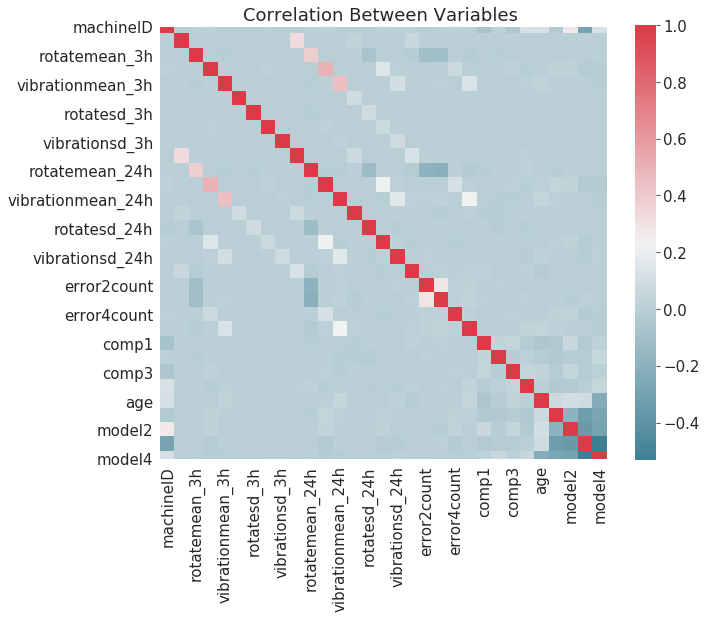

In [75]:
### Correlation Analysis
# It is necessary to eliminate the variables with high correlation (only one), consider> 70%.
f, ax = plt.subplots(figsize=(10, 8))
corr = labeled_features.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title("Correlation Between Variables ")
plt.show()

In [76]:
# We save to apply hyper-parameter optimization.
#labeled_features.to_pickle("final_datset.pickle")

In [77]:
# We establish the times corresponding to the records that will be used for training and tests.
import pandas as pd
threshold_dates = [
    pd.to_datetime("2015-09-30 01:00:00"), pd.to_datetime("2015-10-01 01:00:00")
]

In [78]:
test_results = []
models = []
total = len(threshold_dates)

In [79]:
# We make the partition of separate dates.
last_train_date = threshold_dates[0]
first_test_date = threshold_dates[1]

In [80]:
# Typically 20-30% of data is used.
ntraining = labeled_features.loc[labeled_features["datetime"] < last_train_date]
ntesting = labeled_features.loc[labeled_features["datetime"] > first_test_date]
print(f"{ntraining.shape[0]} records for training.")
print(f"{ntesting.shape[0]} records for testing.")
print(f"{ntesting.shape[0] / ntraining.shape[0] * 100:0.1f}% of the data will be used for testing.")

240024 records for training.
81189 records for testing.
33.8% of the data will be used for testing.


In [81]:
fails_train = ntraining[ntraining["failure"] != "none"].shape[0]
no_fails_train = ntraining[ntraining["failure"] == "none"].shape[0]
fails_test = ntesting[ntesting["failure"] != "none"].shape[0]
no_fails_test = ntesting[ntesting["failure"] == "none"].shape[0]

In [82]:
print(f"{fails_train / no_fails_train * 100:0.1f}% of the cases are training set failures.")
print(f"{fails_test / no_fails_test * 100:0.1f}% of the cases are failures in the test set.")

1.8% of the cases are training set failures.
1.7% of the cases are failures in the test set.


In [83]:

# We assign the corresponding values ​​to training and tests.
train_y = labeled_features.loc[labeled_features["datetime"] < last_train_date, "failure"]
train_X = labeled_features.loc[labeled_features["datetime"] < last_train_date].drop(["datetime",
                                                                                    "machineID",
                                                                                    "failure"], axis=1)
test_y = labeled_features.loc[labeled_features["datetime"] > first_test_date, "failure"]
test_X = labeled_features.loc[labeled_features["datetime"] > first_test_date].drop(["datetime",
                                                                                   "machineID",
                                                                                   "failure"], axis=1)

In [84]:
train_y
test_y

4350      none
4351      none
4352      none
4353      none
4354      none
          ... 
322088    none
322089    none
322090    none
322091    none
322092    none
Name: failure, Length: 81189, dtype: category
Categories (5, object): ['comp1', 'comp2', 'comp3', 'comp4', 'none']

In [86]:
train_X

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,...,error5count,comp1,comp2,comp3,comp4,age,model1,model2,model3,model4
0,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,...,0.0,20.000,215.000,155.000,170.000,18,0,0,1,0
1,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,...,0.0,20.000,215.000,155.000,170.000,18,0,0,1,0
2,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,...,0.0,20.125,215.125,155.125,170.125,18,0,0,1,0
3,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,...,0.0,20.125,215.125,155.125,170.125,18,0,0,1,0
4,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,...,0.0,20.250,215.250,155.250,170.250,18,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321342,155.079380,450.187759,101.838938,44.109299,23.896443,26.392918,10.179211,7.432649,170.528530,444.326173,...,0.0,4.250,64.250,49.250,34.250,5,0,0,0,1
321343,185.390529,435.256907,92.831119,43.530138,18.810846,78.604196,10.683806,0.878059,169.717305,446.631597,...,0.0,4.375,64.375,49.375,34.375,5,0,0,0,1
321344,166.113912,444.157407,103.054512,38.293968,13.242216,34.509446,7.649707,3.353351,171.360297,444.384052,...,0.0,4.500,64.500,49.500,34.500,5,0,0,0,1
321345,157.015479,468.556698,106.294096,42.696208,13.348122,79.293067,7.683379,6.912312,169.644686,443.355974,...,0.0,4.625,64.625,49.625,34.625,5,0,0,0,1


In [86]:
# %%timeit
# Model training.
# model = GradientBoostingClassifier(random_state=42)
model = xgb(n_jobs=-1)
model.fit(train_X, train_y)

[09:37:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [87]:
from xgboost import XGBClassifier
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=None, colsample_bytree=1,
              enable_categorical=False, gamma=0, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, nthread=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, tree_method=None, ...)

In [88]:
# We obtain results on the test set.
test_result = pd.DataFrame(labeled_features.loc[labeled_features["datetime"] > first_test_date])
test_result["predicted_failure"] = model.predict(test_X)
test_results.append(test_result)
models.append(model)

In [89]:
test_results

[        machineID            datetime  voltmean_3h  rotatemean_3h  \
 4350            1 2015-10-01 03:00:00   170.301017     449.036995   
 4351            1 2015-10-01 03:00:00   170.301017     449.036995   
 4352            1 2015-10-01 06:00:00   165.339972     435.660354   
 4353            1 2015-10-01 06:00:00   165.339972     435.660354   
 4354            1 2015-10-01 09:00:00   183.752875     463.058640   
 ...           ...                 ...          ...            ...   
 322088        100 2015-12-31 18:00:00   177.758754     458.391629   
 322089        100 2015-12-31 21:00:00   166.078945     424.431184   
 322090        100 2016-01-01 00:00:00   158.327984     504.056262   
 322091        100 2016-01-01 03:00:00   170.306956     438.653616   
 322092        100 2016-01-01 06:00:00   182.525427     435.932056   
 
         pressuremean_3h  vibrationmean_3h  voltsd_3h  rotatesd_3h  \
 4350          94.805205         40.816797  11.061667    58.425055   
 4351          94.

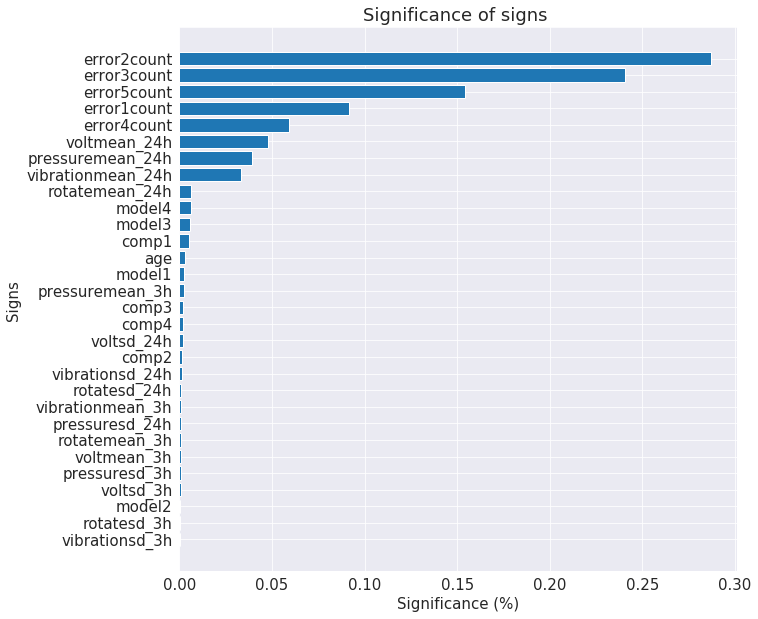

In [90]:
# Below, we plot the feature importances in the (first) trained model
plt.figure(figsize=(10, 10))
labels, importances = zip(*sorted(zip(test_X.columns, models[0].feature_importances_), reverse=False, key=lambda x: x[1]))
plt.yticks(range(len(labels)), labels)
_, labels = plt.xticks()
plt.setp(labels, rotation=0)
plt.barh(range(len(importances)), importances)
plt.ylabel("Signs ")
plt.xlabel("Significance (%)")
plt.title("Significance of signs ")
plt.show()

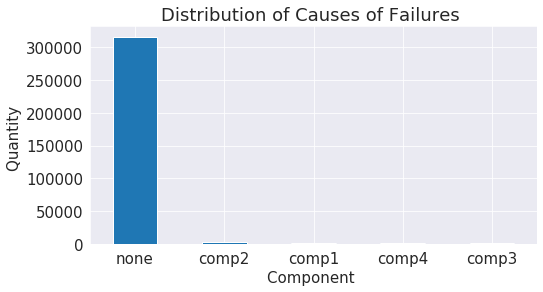

In [91]:
# There is an expected imbalance.
plt.figure(figsize=(8, 4))
labeled_features["failure"].value_counts().plot(kind="bar", rot=0)
plt.title("Distribution of Causes of Failures ")
plt.xlabel("Component ")
plt.ylabel("Quantity ")
plt.show()

In [92]:
def Evaluate(predicted, actual, labels):
    output_labels = []
    output = []
    
    # Calculate and display confusion matrix
    cm = confusion_matrix(actual, predicted, labels=labels)
    #print("Confusion matrix\n- x-axis is true labels (none, comp1, etc.)\n- y-axis is predicted labels")
    #print(cm)
    
    # Calculate precision, recall, and F1 score
    accuracy = np.array([float(np.trace(cm)) / np.sum(cm)] * len(labels))
    precision = precision_score(actual, predicted, average=None, labels=labels)
    recall = recall_score(actual, predicted, average=None, labels=labels)
    f1 = 2 * precision * recall / (precision + recall)
    output.extend([accuracy.tolist(), precision.tolist(), recall.tolist(), f1.tolist()])
    output_labels.extend(["accuracy", "precision", "recall", "F1"])
    
    # Calculate the macro versions of these metrics
    output.extend([[np.mean(precision)] * len(labels),
                   [np.mean(recall)] * len(labels),
                   [np.mean(f1)] * len(labels)])
    output_labels.extend(["macro precision", "macro recall", "macro F1"])
    
    # Find the one-vs.-all confusion matrix
    cm_row_sums = cm.sum(axis = 1)
    cm_col_sums = cm.sum(axis = 0)
    s = np.zeros((2, 2))
    for i in range(len(labels)):
        v = np.array([[cm[i, i],
                       cm_row_sums[i] - cm[i, i]],
                      [cm_col_sums[i] - cm[i, i],
                       np.sum(cm) + cm[i, i] - (cm_row_sums[i] + cm_col_sums[i])]])
        s += v
    s_row_sums = s.sum(axis = 1)
    
    # Add average accuracy and micro-averaged  precision/recall/F1
    avg_accuracy = [np.trace(s) / np.sum(s)] * len(labels)
    micro_prf = [float(s[0,0]) / s_row_sums[0]] * len(labels)
    output.extend([avg_accuracy, micro_prf])
    output_labels.extend(["average accuracy",
                          "micro-averaged precision/recall/F1"])
    
    # Compute metrics for the majority classifier
    mc_index = np.where(cm_row_sums == np.max(cm_row_sums))[0][0]
    cm_row_dist = cm_row_sums / float(np.sum(cm))
    mc_accuracy = 0 * cm_row_dist; mc_accuracy[mc_index] = cm_row_dist[mc_index]
    mc_recall = 0 * cm_row_dist; mc_recall[mc_index] = 1
    mc_precision = 0 * cm_row_dist
    mc_precision[mc_index] = cm_row_dist[mc_index]
    mc_F1 = 0 * cm_row_dist;
    mc_F1[mc_index] = 2 * mc_precision[mc_index] / (mc_precision[mc_index] + 1)
    output.extend([mc_accuracy.tolist(), mc_recall.tolist(),
                   mc_precision.tolist(), mc_F1.tolist()])
    output_labels.extend(["majority class accuracy", "majority class recall",
                          "majority class precision", "majority class F1"])
        
    # Random accuracy and kappa
    cm_col_dist = cm_col_sums / float(np.sum(cm))
    exp_accuracy = np.array([np.sum(cm_row_dist * cm_col_dist)] * len(labels))
    kappa = (accuracy - exp_accuracy) / (1 - exp_accuracy)
    output.extend([exp_accuracy.tolist(), kappa.tolist()])
    output_labels.extend(["expected accuracy", "kappa"])
    

    # Random guess
    rg_accuracy = np.ones(len(labels)) / float(len(labels))
    rg_precision = cm_row_dist
    rg_recall = np.ones(len(labels)) / float(len(labels))
    rg_F1 = 2 * cm_row_dist / (len(labels) * cm_row_dist + 1)
    output.extend([rg_accuracy.tolist(), rg_precision.tolist(),
                   rg_recall.tolist(), rg_F1.tolist()])
    output_labels.extend(["random guess accuracy", "random guess precision",
                          "random guess recall", "random guess F1"])
    
    # Random weighted guess
    rwg_accuracy = np.ones(len(labels)) * sum(cm_row_dist**2)
    rwg_precision = cm_row_dist
    rwg_recall = cm_row_dist
    rwg_F1 = cm_row_dist
    output.extend([rwg_accuracy.tolist(), rwg_precision.tolist(),
                   rwg_recall.tolist(), rwg_F1.tolist()])
    output_labels.extend(["random weighted guess accuracy",
                          "random weighted guess precision",
                          "random weighted guess recall",
                          "random weighted guess F1"])

    output_df = pd.DataFrame(output, columns=labels)
    output_df.index = output_labels
                  
    return output_df



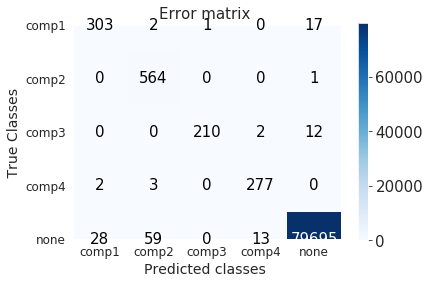

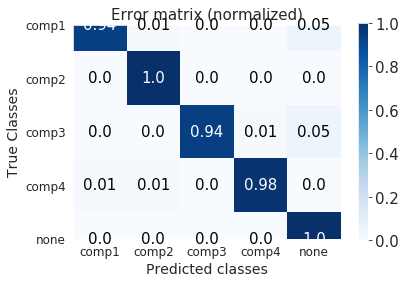

In [93]:
evaluation_results = []
test_result = test_results[0]
evaluation_result = Evaluate(actual = test_result["failure"],
                             predicted = test_result["predicted_failure"],
                             labels = ["none", "comp1", "comp2", "comp3", "comp4"])
skplt.metrics.plot_confusion_matrix(
    test_result["failure"],
    test_result["predicted_failure"],
    normalize=False,
    title=" Error matrix "
)
plt.ylabel(' True Classes ', fontsize=14)
plt.xlabel('Predicted classes ', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Error matrix ", fontsize=15)

skplt.metrics.plot_confusion_matrix(
    test_result["failure"],
    test_result["predicted_failure"],
    normalize=True,
)
plt.ylabel('True Classes', fontsize=14)
plt.xlabel('Predicted classes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Error matrix (normalized)", fontsize=15)

plt.show()



In [94]:
evaluation_results.append(evaluation_result)
evaluation_results[0]  # show full results for first split only

,none,comp1,comp2,comp3,comp4
accuracy,0.998276,0.998276,0.998276,0.998276,0.998276
precision,0.999624,0.909910,0.898089,0.995261,0.948630
recall,0.998747,0.938080,0.998230,0.937500,0.982270
F1,0.999185,0.923780,0.945516,0.965517,0.965157
macro precision,0.950303,0.950303,0.950303,0.950303,0.950303
macro recall,0.970965,0.970965,0.970965,0.970965,0.970965
macro F1,0.959831,0.959831,0.959831,0.959831,0.959831
average accuracy,0.999310,0.999310,0.999310,0.999310,0.999310
micro-averaged precision/recall/F1,0.998276,0.998276,0.998276,0.998276,0.998276
majority class accuracy,0.982830,0.000000,0.000000,0.000000,0.000000


In [95]:
evaluation_results[0].mean(axis=1)[0:4]

accuracy     0.998276
precision    0.950303
recall       0.970965
F1           0.959831
dtype: float64

In [3]:
# For a binary classification problem, the ROC-AUC curve is generally used..
# For this multi-class case we will use precision vs sensitivity.
skplt.metrics.plot_precision_recall_curve(
    test_y,
    model.predict_proba(test_X),
    title="ROC-AUC",
    figsize=(10,10)
)
plt.show()

NameError: name 'skplt' is not defined

In [97]:
evaluation_results[0].loc["recall"].values

array([0.99874679, 0.9380805 , 0.99823009, 0.9375    , 0.9822695 ])

In [2]:
import pandas as pd
recall_df = pd.DataFrame([evaluation_results[0].loc["recall"].values],
                         columns=["none", "comp1", "comp2", "comp3", "comp4"],
                         index=[" Component Sensitivity "])
recall_df.T

NameError: name 'evaluation_results' is not defined

In [99]:
###Individual Test Case

In [100]:
test_values = train_X.iloc[0].values
test_values

array([180.13378397, 440.60832011,  94.1379695 ,  41.55154363,
        21.32273479,  48.77051197,   2.13568373,  10.03720806,
       169.7338089 , 445.1798646 ,  96.79711296,  40.38515999,
        11.23312028,  48.71739478,  10.07988023,   5.85320856,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  20.        , 215.        , 155.        ,
       170.        ,  18.        ,   0.        ,   0.        ,
         1.        ,   0.        ])

In [101]:
train_X

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,...,error5count,comp1,comp2,comp3,comp4,age,model1,model2,model3,model4
0,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,...,0.0,20.000,215.000,155.000,170.000,18,0,0,1,0
1,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,...,0.0,20.000,215.000,155.000,170.000,18,0,0,1,0
2,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,...,0.0,20.125,215.125,155.125,170.125,18,0,0,1,0
3,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,...,0.0,20.125,215.125,155.125,170.125,18,0,0,1,0
4,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,...,0.0,20.250,215.250,155.250,170.250,18,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321342,155.079380,450.187759,101.838938,44.109299,23.896443,26.392918,10.179211,7.432649,170.528530,444.326173,...,0.0,4.250,64.250,49.250,34.250,5,0,0,0,1
321343,185.390529,435.256907,92.831119,43.530138,18.810846,78.604196,10.683806,0.878059,169.717305,446.631597,...,0.0,4.375,64.375,49.375,34.375,5,0,0,0,1
321344,166.113912,444.157407,103.054512,38.293968,13.242216,34.509446,7.649707,3.353351,171.360297,444.384052,...,0.0,4.500,64.500,49.500,34.500,5,0,0,0,1
321345,157.015479,468.556698,106.294096,42.696208,13.348122,79.293067,7.683379,6.912312,169.644686,443.355974,...,0.0,4.625,64.625,49.625,34.625,5,0,0,0,1


In [102]:
# XGBoost accepts only 2-dimensional arrays.
single_test = pd.DataFrame([test_values], columns=test_X.columns, index=[0])
single_test

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,...,error5count,comp1,comp2,comp3,comp4,age,model1,model2,model3,model4
0,180.133784,440.60832,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,...,0.0,20.0,215.0,155.0,170.0,18.0,0.0,0.0,1.0,0.0


In [103]:
probas = model.predict_proba(single_test)
probas

array([[5.8402401e-07, 3.8513414e-07, 3.8463935e-07, 4.3277518e-07,
        9.9999821e-01]], dtype=float32)

In [104]:
prediction = model.predict(single_test)
prediction

array(['none'], dtype=object)

In [105]:
ordered_classes = np.unique(np.array(test_y))
ordered_classes

array(['comp1', 'comp2', 'comp3', 'comp4', 'none'], dtype=object)

In [106]:
gr_test = pd.DataFrame(test_X.values, columns=test_X.columns)
gr_test

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,...,error5count,comp1,comp2,comp3,comp4,age,model1,model2,model3,model4
0,170.301017,449.036995,94.805205,40.816797,11.061667,58.425055,4.931305,2.428740,178.008406,453.336357,...,0.0,28.875,13.875,118.875,28.875,18.0,0.0,0.0,1.0,0.0
1,170.301017,449.036995,94.805205,40.816797,11.061667,58.425055,4.931305,2.428740,178.008406,453.336357,...,0.0,28.875,13.875,118.875,28.875,18.0,0.0,0.0,1.0,0.0
2,165.339972,435.660354,103.351320,31.892462,10.717864,26.009485,22.071933,6.020669,178.277009,452.064940,...,0.0,29.000,14.000,119.000,29.000,18.0,0.0,0.0,1.0,0.0
3,165.339972,435.660354,103.351320,31.892462,10.717864,26.009485,22.071933,6.020669,178.277009,452.064940,...,0.0,29.000,14.000,119.000,29.000,18.0,0.0,0.0,1.0,0.0
4,183.752875,463.058640,109.525083,41.945037,9.369264,43.646584,10.859804,9.395067,176.380067,444.022795,...,0.0,29.125,14.125,119.125,29.125,18.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81184,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,169.764418,454.478787,...,0.0,82.500,7.500,82.500,52.500,5.0,0.0,0.0,0.0,1.0
81185,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,171.547643,452.351565,...,0.0,82.625,7.625,82.625,52.625,5.0,0.0,0.0,0.0,1.0
81186,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,168.806645,459.502212,...,0.0,82.750,7.750,82.750,52.750,5.0,0.0,0.0,0.0,1.0
81187,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,169.011763,465.923073,...,0.0,82.875,7.875,82.875,52.875,5.0,0.0,0.0,0.0,1.0


In [107]:
probas = model.predict_proba(gr_test)
prediction = model.predict(gr_test)
prediction

array(['none', 'none', 'none', ..., 'none', 'none', 'none'], dtype=object)

In [108]:
ordered_classes = np.unique(np.array(test_y))
ordered_classes

array(['comp1', 'comp2', 'comp3', 'comp4', 'none'], dtype=object)

In [109]:
results = pd.DataFrame(probas,
                       columns=ordered_classes)
results

,comp1,comp2,comp3,comp4,none
0,6.591468e-08,6.940923e-08,7.583246e-08,8.078561e-08,1.000000
1,6.591468e-08,6.940923e-08,7.583246e-08,8.078561e-08,1.000000
2,6.986665e-08,7.775035e-08,8.494565e-08,9.049405e-08,1.000000
3,6.986665e-08,7.775035e-08,8.494565e-08,9.049405e-08,1.000000
4,5.681988e-07,4.214248e-07,4.604241e-07,4.904981e-07,0.999998
...,...,...,...,...,...
81184,2.720091e-07,1.188403e-07,1.111689e-07,2.516090e-07,0.999999
81185,1.231505e-07,2.883001e-07,1.197393e-07,1.532179e-07,0.999999
81186,9.457070e-08,9.829634e-08,9.195121e-08,1.176603e-07,1.000000
81187,1.386404e-07,1.110922e-07,1.039209e-07,2.432375e-07,0.999999


In [110]:
print(f" Prediction: {prediction}")
results

 Prediction: ['none' 'none' 'none' ... 'none' 'none' 'none']


,comp1,comp2,comp3,comp4,none
0,6.591468e-08,6.940923e-08,7.583246e-08,8.078561e-08,1.000000
1,6.591468e-08,6.940923e-08,7.583246e-08,8.078561e-08,1.000000
2,6.986665e-08,7.775035e-08,8.494565e-08,9.049405e-08,1.000000
3,6.986665e-08,7.775035e-08,8.494565e-08,9.049405e-08,1.000000
4,5.681988e-07,4.214248e-07,4.604241e-07,4.904981e-07,0.999998
...,...,...,...,...,...
81184,2.720091e-07,1.188403e-07,1.111689e-07,2.516090e-07,0.999999
81185,1.231505e-07,2.883001e-07,1.197393e-07,1.532179e-07,0.999999
81186,9.457070e-08,9.829634e-08,9.195121e-08,1.176603e-07,1.000000
81187,1.386404e-07,1.110922e-07,1.039209e-07,2.432375e-07,0.999999


In [111]:
np.unique(prediction, return_counts = True)

(array(['comp1', 'comp2', 'comp3', 'comp4', 'none'], dtype=object),
 array([  333,   628,   211,   292, 79725]))

In [112]:
for i, j in zip(prediction, range(len(prediction))):
    if i != 'none':
        print(prediction[j], 1-results.none[j])

comp2 0.8214184939861298
comp2 0.8214184939861298
comp2 0.9598057456314564
comp2 0.9598057456314564
comp2 0.878034733235836
comp2 0.878034733235836
comp2 0.961334090679884
comp2 0.961334090679884
comp2 0.997763559455052
comp2 0.997763559455052
comp2 0.9877817602828145
comp2 0.9877817602828145
comp2 0.999085413524881
comp2 0.999085413524881
comp2 0.9990847894223407
comp2 0.9990847894223407
comp4 0.9945371225476265
comp4 0.9945371225476265
comp4 0.9940800722688437
comp4 0.9940800722688437
comp4 0.9982694254722446
comp4 0.9982694254722446
comp4 0.9993528376217
comp4 0.9993528376217
comp4 0.9995422767824493
comp4 0.9995422767824493
comp4 0.9997507609659806
comp4 0.9997507609659806
comp4 0.99870885303244
comp4 0.99870885303244
comp4 0.9993595068808645
comp4 0.9993595068808645
comp2 0.915449284017086
comp2 0.915449284017086
comp2 0.9353265687823296
comp2 0.9353265687823296
comp2 0.9849735423922539
comp2 0.9849735423922539
comp2 0.9789162762463093
comp2 0.9789162762463093
comp2 0.997103851754

comp2 0.9999544150123256
comp2 0.99941837543156
comp4 0.9997361365531106
comp4 0.9998780542518944
comp4 0.9998282240703702
comp4 0.9998643131548306
comp4 0.9999685485163354
comp4 0.9999205703934422
comp4 0.999957577441819
comp4 0.9998733068059664
comp2 0.9999365349212894
comp2 0.9999301997668226
comp2 0.9999082693902892
comp2 0.9999442249682033
comp2 0.9999644516028638
comp2 0.9999202581238933
comp2 0.9999643101873517
comp2 0.9996471588965505
comp1 0.9999174175609369
comp1 0.9998301978048403
comp1 0.9998147608421277
comp1 0.9998152810730971
comp1 0.9999250256805681
comp1 0.9999666971489205
comp1 0.9999822926529305
comp1 0.9996500304550864
comp1 0.9996500304550864
comp4 0.9994105951627716
comp4 0.99992417460453
comp4 0.9989592100027949
comp4 0.9984724170062691
comp4 0.9957792269997299
comp4 0.9976244398858398
comp4 0.9999364613613579
comp4 0.9999540416938544
comp1 0.9965297849848866
comp1 0.99739451543428
comp1 0.9971940033137798
comp1 0.9994531637057662
comp1 0.9993621542234905
comp1 0

In [113]:
test_X.head()

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,...,error5count,comp1,comp2,comp3,comp4,age,model1,model2,model3,model4
4350,170.301017,449.036995,94.805205,40.816797,11.061667,58.425055,4.931305,2.428740,178.008406,453.336357,...,0.0,28.875,13.875,118.875,28.875,18,0,0,1,0
4351,170.301017,449.036995,94.805205,40.816797,11.061667,58.425055,4.931305,2.428740,178.008406,453.336357,...,0.0,28.875,13.875,118.875,28.875,18,0,0,1,0
4352,165.339972,435.660354,103.351320,31.892462,10.717864,26.009485,22.071933,6.020669,178.277009,452.064940,...,0.0,29.000,14.000,119.000,29.000,18,0,0,1,0
4353,165.339972,435.660354,103.351320,31.892462,10.717864,26.009485,22.071933,6.020669,178.277009,452.064940,...,0.0,29.000,14.000,119.000,29.000,18,0,0,1,0
4354,183.752875,463.058640,109.525083,41.945037,9.369264,43.646584,10.859804,9.395067,176.380067,444.022795,...,0.0,29.125,14.125,119.125,29.125,18,0,0,1,0


In [114]:
train_X.head(20)

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,...,error5count,comp1,comp2,comp3,comp4,age,model1,model2,model3,model4
0,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,...,0.0,20.000,215.000,155.000,170.000,18,0,0,1,0
1,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,...,0.0,20.000,215.000,155.000,170.000,18,0,0,1,0
2,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,...,0.0,20.125,215.125,155.125,170.125,18,0,0,1,0
3,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,...,0.0,20.125,215.125,155.125,170.125,18,0,0,1,0
4,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,...,0.0,20.250,215.250,155.250,170.250,18,0,0,1,0
5,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,...,0.0,20.250,215.250,155.250,170.250,18,0,0,1,0
6,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,...,0.0,20.375,215.375,155.375,170.375,18,0,0,1,0
7,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,...,0.0,20.375,215.375,155.375,170.375,18,0,0,1,0
8,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,...,0.0,20.500,215.500,155.500,170.500,18,0,0,1,0
9,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,...,0.0,20.500,215.500,155.500,170.500,18,0,0,1,0


In [115]:
train_y.head(100)

0     none
1     none
2     none
3     none
4     none
      ... 
95    none
96    none
97    none
98    none
99    none
Name: failure, Length: 100, dtype: category
Categories (5, object): ['comp1', 'comp2', 'comp3', 'comp4', 'none']

In [116]:
labeled_features.loc[labeled_features['failure'] != 'none'].sample(5)

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,comp1,comp2,comp3,comp4,age,failure,model1,model2,model3,model4
135654,37,2015-01-03 18:00:00,168.575654,413.836635,100.672096,49.993160,6.437966,22.045321,8.909774,8.408868,...,96.50,216.50,126.50,141.50,16,comp4,1,0,0,0
166149,47,2015-06-23 06:00:00,168.555372,460.530808,123.935516,39.826156,4.415701,31.726183,3.388848,3.554960,...,30.00,75.00,0.00,15.00,6,comp3,0,1,0,0
309451,96,2015-08-31 00:00:00,156.123553,511.300682,120.418246,36.260200,31.028234,17.831169,1.854732,4.824945,...,89.75,29.75,44.75,14.75,10,comp3,0,1,0,0
106685,27,2015-01-24 12:00:00,166.507735,463.777330,103.652386,43.008760,8.929132,4.544870,2.683463,5.881180,...,162.25,14.25,14.25,117.25,9,comp1,0,0,1,0
214317,64,2015-01-04 12:00:00,161.697840,454.250565,94.778724,48.921087,17.223624,26.267356,7.723109,10.549559,...,127.25,52.25,37.25,172.25,20,comp4,0,0,1,0


In [117]:
test_value_2 = train_X.iloc[41].values
test_value_2


array([176.45055031, 446.03306817,  84.52155451,  47.63883556,
         8.07140042,  76.51134295,   2.63687945,   4.10862111,
       170.17632054, 445.06959449, 102.35993898,  51.51871879,
        18.40576279,  35.81993833,   9.74376885,   5.24643508,
         0.        ,   0.        ,   1.        ,   0.        ,
         1.        ,  22.5       , 217.5       , 157.5       ,
       172.5       ,  18.        ,   0.        ,   0.        ,
         1.        ,   0.        ])

In [118]:
single_test_2 = pd.DataFrame([test_value_2], columns=test_X.columns, index=[0])
single_test_2


,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,...,error5count,comp1,comp2,comp3,comp4,age,model1,model2,model3,model4
0,176.45055,446.033068,84.521555,47.638836,8.0714,76.511343,2.636879,4.108621,170.176321,445.069594,...,1.0,22.5,217.5,157.5,172.5,18.0,0.0,0.0,1.0,0.0


In [119]:
prediction = model.predict(single_test_2)
prediction

array(['none'], dtype=object)

In [120]:
test_value_3 = train_X.iloc[44].values
test_value_3

array([169.98513445, 458.92941817,  91.49436159,  54.88202087,
         9.45148289,  12.05275189,   3.68590623,   6.62118295,
       175.12113123, 443.91639151, 102.13017883,  51.65329392,
        19.14128711,  37.01882431,  10.64295617,   4.618287  ,
         0.        ,   0.        ,   0.        ,   0.        ,
         1.        ,  22.75      , 217.75      , 157.75      ,
       172.75      ,  18.        ,   0.        ,   0.        ,
         1.        ,   0.        ])

In [121]:
single_test_3 = pd.DataFrame([test_value_3], columns=test_X.columns, index=[0])
single_test_3

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,...,error5count,comp1,comp2,comp3,comp4,age,model1,model2,model3,model4
0,169.985134,458.929418,91.494362,54.882021,9.451483,12.052752,3.685906,6.621183,175.121131,443.916392,...,1.0,22.75,217.75,157.75,172.75,18.0,0.0,0.0,1.0,0.0


In [122]:
prediction = model.predict(single_test_3)
prediction

array(['comp4'], dtype=object)

In [123]:
test_value_3 = train_X.iloc[45].values
single_test_3 = pd.DataFrame([test_value_3], columns=test_X.columns, index=[0])
prediction = model.predict(single_test_3)
prediction


array(['comp4'], dtype=object)

In [124]:

test_value_3 = train_X.iloc[236920].values
single_test_3 = pd.DataFrame([test_value_3], columns=test_X.columns, index=[0])
prediction = model.predict(single_test_3)
prediction


array(['none'], dtype=object)

In [125]:
# Rand_df = pd.DataFrame({'Actual': test_y, 'Predicted': prediction})
# Rand_df


ValueError: array length 1 does not match index length 81189

In [ ]:
# # Rand_df.loc[Rand_df['Predicted'] != 'none']
# Rand_df[((Rand_df['Actual'] ) != (Rand_df['Predicted']))]

In [126]:
#####Different Alg
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
clf = RandomForestClassifier()
# clf = MultinomialNB()
# clf = LogisticRegression()
# clf = svm.SVC()
# clf = KNeighborsClassifier()
# unite the features and classifier together
pipe = Pipeline([
                 ('clf',clf)
                 ])



In [127]:
# # pipe = Pipeline([('scaler', StandardScaler()),  ('nB',MultinomialNB()), ('rf',RandomForestClassifier()),('KNN',KNeighborsClassifier())])
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import VarianceThreshold # Feature selector
# pipe = Pipeline([
# ('scaler', StandardScaler()),
# ('selector', VarianceThreshold()),
# ('classifier', KNeighborsClassifier())
# ])

In [128]:
pipe.fit(train_X, train_y)
preds = pipe.predict(test_X)

In [129]:
print('Training set score: ' + str(pipe.score(train_X, train_y)))
print('Test set score: ' + str(pipe.score(test_X, test_y)))


Training set score: 0.999666699996667
Test set score: 0.9981894098954291


In [130]:
from sklearn.metrics import classification_report
print(classification_report(test_y,preds))

              precision    recall  f1-score   support

       comp1       0.91      0.93      0.92       323
       comp2       0.89      1.00      0.94       565
       comp3       1.00      0.93      0.97       224
       comp4       0.95      0.98      0.96       282
        none       1.00      1.00      1.00     79795

    accuracy                           1.00     81189
   macro avg       0.95      0.97      0.96     81189
weighted avg       1.00      1.00      1.00     81189



In [131]:
Rand_df = pd.DataFrame({'Actual': test_y, 'Predicted': preds})
Rand_df


,Actual,Predicted
4350,none,none
4351,none,none
4352,none,none
4353,none,none
4354,none,none
...,...,...
322088,none,none
322089,none,none
322090,none,none
322091,none,none


In [132]:
Rand_df[((Rand_df['Actual'] ) != (Rand_df['Predicted']))]

,Actual,Predicted
4594,none,comp2
4595,none,comp2
4596,none,comp2
4597,none,comp2
4598,none,comp2
...,...,...
292949,comp1,none
298186,none,comp4
298529,comp3,none
304267,comp4,comp2


In [133]:
pipe

Pipeline(steps=[('clf', RandomForestClassifier())])

In [134]:
preds

array(['none', 'none', 'none', ..., 'none', 'none', 'none'], dtype=object)

In [135]:
#Create a pipeline consisting of a linear SVM, a simple Decision Tree and a simple Random Forest Classifier
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import tree
## KEEP IT FOR NOW
# Construct some pipelines
pipe_svm = Pipeline([('pca', PCA(n_components=27)),
        ('clf', svm.SVC(random_state=123))])
        
pipe_tree = Pipeline([('pca', PCA(n_components=27)),
        ('clf', tree.DecisionTreeClassifier(random_state=123))])
pipe_rf = Pipeline([('pca', PCA(n_components=27)),
        ('clf', RandomForestClassifier(random_state=123))])
# List of pipelines, List of pipeline names
pipelines = [pipe_svm, pipe_tree, pipe_rf]
pipeline_names = ['Support Vector Machine','Decision Tree','Random Forest']
# Loop to fit each of the three pipelines


In [136]:
from sklearn.tree import DecisionTreeClassifier
for pipe in pipelines:
    # print(pipe)
    pipe.fit(train_X, train_y)
    preds = pipe.predict(test_X)
# Compare accuracies
for index, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipeline_names[index], val.score(test_X, test_y)))
    print('Training set score: ' + str(pipe.score(train_X, train_y)))
    print('Test set score: ' + str(pipe.score(test_X, test_y))) 
    print(classification_report(test_y,preds))


Support Vector Machine pipeline test accuracy: 0.983
Training set score: 0.999666699996667
Test set score: 0.9955905356636983
              precision    recall  f1-score   support

       comp1       0.87      0.89      0.88       323
       comp2       0.90      1.00      0.94       565
       comp3       1.00      0.94      0.97       224
       comp4       0.75      0.40      0.53       282
        none       1.00      1.00      1.00     79795

    accuracy                           1.00     81189
   macro avg       0.90      0.85      0.86     81189
weighted avg       1.00      1.00      1.00     81189

Decision Tree pipeline test accuracy: 0.994
Training set score: 0.999666699996667
Test set score: 0.9955905356636983
              precision    recall  f1-score   support

       comp1       0.87      0.89      0.88       323
       comp2       0.90      1.00      0.94       565
       comp3       1.00      0.94      0.97       224
       comp4       0.75      0.40      0.53       2

In [137]:
##########

In [138]:
######ENSEMBLE MODELS

In [89]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [140]:
rf_clf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=10, n_jobs=1, random_state=42)

In [141]:
preds_ens = rf_clf.predict(test_X)

In [142]:
Ensemble_df = pd.DataFrame({'Actual': test_y, 'Predicted': preds_ens})
Ensemble_df

,Actual,Predicted
4350,none,none
4351,none,none
4352,none,none
4353,none,none
4354,none,none
...,...,...
322088,none,none
322089,none,none
322090,none,none
322091,none,none


In [143]:
Ensemble_df[((Ensemble_df['Actual'] ) != (Ensemble_df['Predicted']))]

,Actual,Predicted
4594,none,comp2
4595,none,comp2
4596,none,comp2
4597,none,comp2
4598,none,comp2
...,...,...
292948,comp1,none
304267,comp4,comp2
307509,comp1,none
307510,comp1,none


In [144]:
print('Training set score: ' + str(rf_clf.score(train_X, train_y)))
print('Test set score: ' + str(rf_clf.score(test_X, test_y)))
print(classification_report(test_y,preds_ens))

Training set score: 0.9996625337466254
Test set score: 0.9982263607138898
              precision    recall  f1-score   support

       comp1       0.91      0.92      0.91       323
       comp2       0.90      1.00      0.95       565
       comp3       1.00      0.93      0.97       224
       comp4       0.95      0.99      0.97       282
        none       1.00      1.00      1.00     79795

    accuracy                           1.00     81189
   macro avg       0.95      0.97      0.96     81189
weighted avg       1.00      1.00      1.00     81189



In [94]:
#Bagging
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=rf_clf, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [146]:
bag_clf.fit(train_X, train_y)

BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=10,
                                                        n_jobs=1,
                                                        random_state=42),
                  n_estimators=1000, n_jobs=-1, random_state=42)

In [158]:
bag_preds = bag_clf.predict(test_X)

In [159]:
print('Training set score: ' + str(bag_clf.score(train_X, train_y)))
print('Test set score: ' + str(bag_clf.score(test_X, test_y)))
print(classification_report(test_y,bag_preds))

Training set score: 0.9996625337466254
Test set score: 0.9981894098954291
              precision    recall  f1-score   support

       comp1       0.91      0.93      0.92       323
       comp2       0.89      1.00      0.94       565
       comp3       1.00      0.94      0.97       224
       comp4       0.95      0.98      0.96       282
        none       1.00      1.00      1.00     79795

    accuracy                           1.00     81189
   macro avg       0.95      0.97      0.96     81189
weighted avg       1.00      1.00      1.00     81189



In [147]:
preds_bag = bag_clf.predict(test_X)
Bag_df = pd.DataFrame({'Actual': test_y, 'Predicted': preds_bag})
Bag_df

,Actual,Predicted
4350,none,none
4351,none,none
4352,none,none
4353,none,none
4354,none,none
...,...,...
322088,none,none
322089,none,none
322090,none,none
322091,none,none


In [148]:
Bag_df[((Bag_df['Actual'] ) != (Bag_df['Predicted']))]

,Actual,Predicted
4594,none,comp2
4595,none,comp2
4596,none,comp2
4597,none,comp2
4598,none,comp2
...,...,...
298186,none,comp4
298529,comp3,none
304267,comp4,comp2
307509,comp1,none


In [149]:
# #Gradient Tree Boosting
# from sklearn.ensemble import GradientBoostingClassifier
# m = GradientBoostingClassifier(n_estimators=10)

# m.fit(train_X, train_y)
# Tree_ens = m.predict(test_X)
# T_ens = pd.DataFrame({'Actual': test_y, 'Predicted': Tree_ens})
# T_ens

,Actual,Predicted
4350,none,none
4351,none,none
4352,none,none
4353,none,none
4354,none,none
...,...,...
322088,none,none
322089,none,none
322090,none,none
322091,none,none


In [150]:
# T_ens[((T_ens['Actual'] ) != (T_ens['Predicted']))]

,Actual,Predicted
4594,none,comp2
4595,none,comp2
4596,none,comp2
4597,none,comp2
4598,none,comp2
...,...,...
307511,comp1,none
307512,comp1,none
307513,comp1,none
307514,comp1,none


In [92]:
#Voting Classifier
#The idea behind the voting classifier implementation is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. 
#Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.
from sklearn.ensemble import VotingClassifier

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


m = VotingClassifier(
    estimators=[('lr', LogisticRegression()), 
                ('rf', RandomForestClassifier()), 
                ('gnb', GaussianNB())], 
    voting='hard')

In [161]:
m.fit(train_X, train_y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('gnb', GaussianNB())])

In [162]:
preds_voting = m.predict(test_X)

In [163]:


print('Training set score: ' + str(m.score(train_X, train_y)))
print('Test set score: ' + str(m.score(test_X, test_y)))
print(classification_report(test_y,preds_voting))

Training set score: 0.9991125887411259
Test set score: 0.9977952678318491
              precision    recall  f1-score   support

       comp1       0.88      0.92      0.90       323
       comp2       0.87      1.00      0.93       565
       comp3       0.97      0.95      0.96       224
       comp4       0.96      0.98      0.97       282
        none       1.00      1.00      1.00     79795

    accuracy                           1.00     81189
   macro avg       0.93      0.97      0.95     81189
weighted avg       1.00      1.00      1.00     81189



In [ ]:
Voting_ens = m.predict(test_X)
Voting_e = pd.DataFrame({'Actual': test_y, 'Predicted': Voting_ens})
Voting_e

In [ ]:
Voting_e[((Voting_e['Actual'] ) != (Voting_e['Predicted']))]

In [87]:
#AdaBoosting
from sklearn.tree import DecisionTreeClassifier
# forest = RandomForestClassifier()
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))


In [88]:
ada.fit(train_X, train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [89]:
preds_ada = ada.predict(test_X)

In [91]:
from sklearn.metrics import classification_report
print('Training set score: ' + str(ada.score(train_X, train_y)))
print('Test set score: ' + str(ada.score(test_X, test_y)))
print(classification_report(test_y,preds_ada))

Training set score: 0.9964545212145453
Test set score: 0.9969084481887941
              precision    recall  f1-score   support

       comp1       0.86      0.89      0.87       323
       comp2       0.89      1.00      0.94       565
       comp3       0.84      0.84      0.84       224
       comp4       0.86      0.98      0.91       282
        none       1.00      1.00      1.00     79795

    accuracy                           1.00     81189
   macro avg       0.89      0.94      0.91     81189
weighted avg       1.00      1.00      1.00     81189



In [ ]:
AdaBoost_ens = ada.predict(test_X)
Ada_ens = pd.DataFrame({'Actual': test_y, 'Predicted': AdaBoost_ens})
Ada_ens

In [ ]:
Ada_ens[((Ada_ens['Actual'] ) != (Ada_ens['Predicted']))]

In [ ]:
#######################

In [99]:
##Stacking##
from sklearn.ensemble import RandomForestClassifier
# forest = RandomForestClassifier()
# ada = AdaBoostClassifier(base_estimator=forest, n_estimators=100,
#                          learning_rate=0.5, random_state=42)
# bag_clf = BaggingClassifier(base_estimator=ada, n_estimators=50,
#                             max_samples=1.0, max_features=1.0, bootstrap=True,
#                             bootstrap_features=False, n_jobs=-1,
#                             random_state=42)
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))
bag_clf = BaggingClassifier(base_estimator=ada)

In [100]:
bag_clf.fit(train_X, train_y)

BaggingClassifier(base_estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)))

In [101]:
preds_stack = bag_clf.predict(test_X)

In [103]:

print('Training set score: ' + str(bag_clf.score(train_X, train_y)))
print('Test set score: ' + str(bag_clf.score(test_X, test_y)))
print(classification_report(test_y,preds_stack))

Training set score: 0.9973419324734193
Test set score: 0.9971424700390447
              precision    recall  f1-score   support

       comp1       0.86      0.90      0.88       323
       comp2       0.90      0.97      0.93       565
       comp3       0.95      0.85      0.90       224
       comp4       0.94      0.93      0.93       282
        none       1.00      1.00      1.00     79795

    accuracy                           1.00     81189
   macro avg       0.93      0.93      0.93     81189
weighted avg       1.00      1.00      1.00     81189



In [ ]:
#shap
model

In [ ]:
# !pip install shap
import shap
X_frame = labeled_features.drop(["datetime", "machineID","failure"], axis=1)
# X_frame = pd.DataFrame(data=X, columns=X.design_info.column_names)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_frame)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:,:-1], X_frame)

In [ ]:
# See how every feaure contributes to the model output
shap.summary_plot(shap_values, X_frame)

In [ ]:
shap_values

In [ ]:
shap_values = explainer(X_frame[:100])
shap.plots.bar(shap_values)

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.waterfall_plot(explainer.base_values[0], values[0], X[0])

In [ ]:
shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0])

In [ ]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0])